In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mlflow --quiet
!pip install pyngrok --quiet
!pip install pyyaml==5.4.1 --quiet

     |████████████████████████████████| 16.8 MB 688 kB/s 
     |████████████████████████████████| 210 kB 66.1 MB/s 
     |████████████████████████████████| 79 kB 6.2 MB/s 
     |████████████████████████████████| 62 kB 602 kB/s 
     |████████████████████████████████| 146 kB 56.8 MB/s 
     |████████████████████████████████| 181 kB 55.9 MB/s 
     |████████████████████████████████| 596 kB 48.5 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 78 kB 5.6 MB/s 
     |████████████████████████████████| 745 kB 4.0 MB/s 
     |████████████████████████████████| 636 kB 4.3 MB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, KFold
# from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import mlflow
import math
import plotly.express as px
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Telco_customer.xlsx')

In [ ]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
#data['Churn Reason'].unique

In [ ]:

with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-colab")

# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "224GtSsk6fJBzMAJmKBdpK3b8PN_2usGg659SFcxakfSKDjbb"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://e10d-35-185-148-207.ngrok.io


In [ ]:
def report(df):  # one liner
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [ ]:
report(df)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


In [ ]:
df['Total Charges'] = df['Total Charges'].apply(str)
df['Total Charges'] = df['Total Charges'].str.strip()
df['Total Charges'] = pd.to_numeric(df['Total Charges'])
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [ ]:
df_model = df.copy()
targetVariableName = 'Churn Label'
summary_df = report(df_model)
one_hot_cols = summary_df[summary_df['d_type']=='object']['Column']
summary_df

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


In [ ]:
#Dropping Country columns as it has only one value type - United States. Also only California state is present
print(df_model['Country'].value_counts())
del df_model['Country']
del df_model['State']
del df_model['CustomerID']
del df_model['City']
del df_model['Zip Code']


#Dropping Count columns as it has only one value type - 1
print(df_model['Count'].value_counts())
del df_model['Count']

#Also deleting latitute and longitutes as it has no purpose and other target related variable
for items in ['Lat Long', 'Latitude','Longitude','Churn Score', 'CLTV', 'Churn Reason']:
#for items in ['Lat Long','Churn Score', 'CLTV', 'Churn Reason']:
    del df_model[items]

United States    7043
Name: Country, dtype: int64
1    7043
Name: Count, dtype: int64


In [ ]:
print(df_model.isna().sum())
df_model.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df_model.isna().sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
dtype: int64


Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
dtype: int64

In [ ]:

def imputeTotalCharges(df):
  for index, row in df.iterrows():
    if(math.isnan(row['Total Charges'])):
      df.at[index, 'Total Charges'] = df.at[index, 'Monthly Charges'] * df.at[index, 'Tenure Months']
      #row['Total Charges'] = row['Monthly Charges'] * row['Tenure Months']
  return df
df_model = imputeTotalCharges(df_model)


In [ ]:
df_1 = df_model.copy()

In [ ]:

fig = px.pie(df_1['Churn Label'].value_counts().reset_index().rename(columns={'index':'Type'}), color_discrete_sequence=px.colors.sequential.Blues, values='Churn Label', names='Type', width=400, height=400)
fig.update_traces(textfont_size=18, textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Churn Distribution', title_x=0.5,title_y=0.9, showlegend=False)
fig.show()

In [ ]:
fig = px.pie(df_1['Payment Method'].value_counts().reset_index().rename(columns={'index':'Type'}), color_discrete_sequence=px.colors.sequential.Blues, values='Payment Method', names='Type', title='Payment Method Distribution')
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
#Defining bar chart function
def bar(feature, df=df_1 ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn_Value']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    

    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn_Value', title=f'Churn rate by {feature}', barmode="group",color_continuous_scale = "blues")
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.2,
                y=1.2,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
     
    return fig.show()

In [ ]:
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in df_1.columns]
df_1.columns = all_columns
df_1

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0


In [ ]:
#Gender feature plot
bar('Gender')
#SeniorCitizen feature plot 
bar('Senior_Citizen')
 #convert 1 to Yes in all data instances#bar('Senior_Citizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')
#Payment method feature plot
bar('Payment_Method')

In [ ]:
bar('Phone_Service')
bar('Multiple_Lines')
bar('Internet_Service')

In [ ]:
bar('Online_Security')
bar('Online_Backup')
bar('Device_Protection')

In [ ]:
bar('Tech_Support')
bar('Streaming_TV')
bar('Streaming_Movies')

In [ ]:
bar("Contract")
bar("Paperless_Billing")

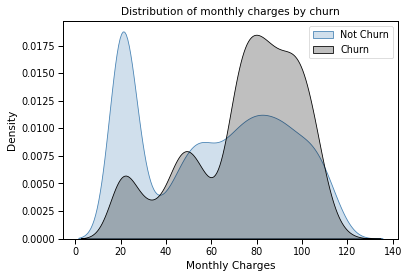

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_1.Monthly_Charges[(df_1['Churn_Value'] == 0) ],
                color="steelblue", shade = True);
ax = sns.kdeplot(df_1.Monthly_Charges[(df_1['Churn_Value'] == 1) ],
                ax =ax, color="Black", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [ ]:
df_2 = df_model.copy()
codes = {'Male':0, 'Female':1}
df_2['Gender'] = df_2['Gender'].map(codes)

codes = {'No':0, 'Yes':1}
for items in ['Senior Citizen', 'Partner','Dependents','Phone Service','Paperless Billing']:
	df_2[items] = df_2[items].map(codes)

codes = {'No':0, 'Yes':1,'No phone service':2}
df_2['Multiple Lines'] = df_2['Multiple Lines'].map(codes)

codes = {'DSL':0, 'Fiber optic':1,'No':2}
df_2['Internet Service'] = df_2['Internet Service'].map(codes)

codes = {'Yes':0, 'No':1,'No internet service':2}
for items in ['Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']:
	df_2[items] = df_2[items].map(codes)

codes = {'Month-to-month':0, 'Two year':1,'One year':2}
df_2['Contract'] = df_2['Contract'].map(codes)

codes = {'Mailed check':0, 'Electronic check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3}
df_2['Payment Method'] = df_2['Payment Method'].map(codes)


In [ ]:
df_model.columns
x_ols_features = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months','Phone Service', 'Multiple Lines', 'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing','Payment Method', 'Monthly Charges', 'Total Charges']
y_ols = df_2["Churn Value"]

In [ ]:
def get_stats():
    x_ols = df_2[x_ols_features]
    results = sm.OLS(y_ols, x_ols.astype(float)).fit()
    results_summary = results.summary()
    #print(results_summary)
    results_as_html = results_summary.tables[1].as_html()
    result_sum = pd.read_html(results_as_html, header=0, index_col=0)[0]
    p_val = result_sum['P>|t|']
    if max(p_val) <= 0.05 : 
        return x_ols_features , p_val, False
    #st.header('Column to be removed is',p_val.idxmax())
    print("*******************")
    print("Droping " + p_val.idxmax())
    x_ols_features.remove(p_val.idxmax())    
    return x_ols_features, p_val, True

In [ ]:
con = True
while(con):
  x_ols_features, p_val, con = get_stats()

*******************
Droping Multiple Lines
*******************
Droping Streaming TV
*******************
Droping Gender
*******************
Droping Streaming Movies


In [ ]:
df_model = df_model[x_ols_features]
df_model.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,No,No,No,2,Yes,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,No,No,Yes,2,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,No,No,Yes,8,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,820.50
3,No,Yes,Yes,28,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,No,No,Yes,49,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [ ]:

cat_columns = [cname for cname in df_model.columns if df_model[cname].dtype == "object"]
#print(cat_columns)
encoder=OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame (encoder.fit_transform(df_model[cat_columns]))
train_X_encoded.columns = encoder.get_feature_names(cat_columns)

df_model.drop(cat_columns ,axis=1, inplace=True)

df_model2= pd.concat([df_model, train_X_encoded ], axis=1)
df_model2[targetVariableName] = y_ols

# We need 'categorical' type for categorical columns for lightgbm
#for col in df_model.columns:
#    if col in cat_columns:
#        df_model[col] = df_model[col].astype('category')

#df_model2 = pd.get_dummies(df_model, columns = cat_columns)
number=LabelEncoder()
df_model2[targetVariableName]=number.fit_transform(df_model2[targetVariableName])
df_model2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Tenure Months,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label
0,2,53.85,108.15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,2,70.70,151.65,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,8,99.65,820.50,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,28,104.80,3046.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,49,103.70,5036.30,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
7039,24,84.80,1990.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
7040,72,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
7041,11,29.60,346.45,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
import pickle
with open("encoder", "wb") as f: 
    pickle.dump(encoder, f)

df_model2

,Tenure Months,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label
0,2,53.85,108.15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,2,70.70,151.65,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,8,99.65,820.50,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,28,104.80,3046.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,49,103.70,5036.30,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
7039,24,84.80,1990.50,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
7040,72,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
7041,11,29.60,346.45,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
X = df_model2.drop('Churn Label', axis=1)
y = df_model2['Churn Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Tenure Months,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,...,Tech Support_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2142,71,98.65,6962.85,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1623,16,93.20,1573.70,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6074,32,104.05,3416.85,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1362,24,40.65,933.30,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6754,20,20.05,406.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,42,100.40,4303.65,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5191,39,20.70,762.45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5226,19,20.20,387.40,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5390,35,19.90,666.00,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import multiprocessing
import time
n_cpus = multiprocessing.cpu_count()
n_cpus

2

In [ ]:
def evaluation(model, x_train, y_train, x_test, y_test):

    pred = model.predict(x_test)
    
    '''
    classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
    print("Test Result:\n================================================")
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"F1 Score: {round(f1_score(y_test, pred, average=avgMethod), 5)}")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{classifier_report}")
    print("_______________________________________________")
    '''
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    
    return round(f1_score(y_test, pred,average='weighted'), 5)

def lrModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1= time.time()
    params = {
        "C": [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], # For Regularization
          "solver": ["liblinear"]}

    lr = LogisticRegression()
    lr_cv = GridSearchCV(lr, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    lr_cv.fit(X_train, y_train)
    best_params = lr_cv.best_params_

    print(f"Best parameters: {best_params}")
    lr = LogisticRegression(**best_params,class_weight='balanced')
    lr.fit(X_train, y_train)
    lr_f1=evaluation(lr, X_train, y_train, X_test, y_test)
    t2 = time.time()
    print("LR is done with F1 score " + str(lr_f1) + " Time is " + str(t2-t1))

def svmModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1= time.time()
    params={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']
           }
    svm = SVC()
    svm_cv= GridSearchCV(svm, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    svm_cv.fit(X_train, y_train)
    best_params = svm_cv.best_params_
    print(f"Best parameters: {best_params}")
    #best_params = {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
    svm=SVC(**best_params)
    svm.fit(X_train, y_train)
    svm_f1=evaluation(svm, X_train, y_train, X_test, y_test)
    t2= time.time()
    print("SVM is done with F1 score " + str(svm_f1)  + " Time is " + str(t2-t1))


def randomForestModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1= time.time()
    params = { 'n_estimators': [50, 150, 250,350,450],
      'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
      'min_samples_split': [2, 4, 6]
      }

    rfc = RandomForestClassifier()
    rfc_cv = GridSearchCV(rfc, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    rfc_cv.fit(X_train, y_train)
    best_params = rfc_cv.best_params_
    print(f"Best parameters: {best_params}")
    #best_params = {'max_features': 0.5, 'min_samples_split': 6, 'n_estimators': 250}
    rfc = RandomForestClassifier(**best_params)
    rfc.fit(X_train, y_train)
    rf_f1=evaluation(rfc, X_train, y_train, X_test, y_test)
    t2= time.time()
    print("RandomForest is done with F1 score " + str(rf_f1)  + " Time is " + str(t2-t1))

def knnModelWithParameterTuning(X_train, y_train, X_test, y_test):
    t1= time.time()

    f1 = []

    for i in range(1, 10):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        f1.append(f1_score(y_test, knn.predict(X_test)))
    #print(accuracy_scores)
    nVal=f1.index(max(f1))
    print(nVal)
    #print("Trained KNN MODEL")
    #print("Printing Out the model performance")
    knn = KNeighborsClassifier(n_neighbors = nVal+1)
    knn.fit(X_train, y_train)
    print(f1)

    plt.figure(figsize=(12, 8))
    plt.plot(range(1,10), f1, label="Train score")
    # plt.plot(neighbors, test_score, label="Test score")
    plt.xticks(np.arange(1, 10, 1))
    plt.xlabel("Number of Neighbors")
    plt.ylabel("Model Score")
    plt.legend()
    knn_f1=evaluation(knn, X_train, y_train, X_test, y_test)
    t2= time.time()
    print("KNN is done with F1 score " + str(knn_f1)  + " Time is " + str(t2-t1) )

def XGBoostWithParameterTuning(X_train, y_train, X_test, y_test):
    import xgboost as xgb
    t1= time.time()

    xgb_m = xgb.XGBClassifier()
    params = {
    'n_estimators': range(5,10),
    #'n_estimators': [18],
    'max_depth': range(1,5),
    #'max_depth': [1],
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
     'min_child_weight': [0.001,0.003,0.01],
    }
    xgb_cv = GridSearchCV(xgb_m, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    xgb_cv.fit(X_train, y_train)
    best_params = xgb_cv.best_params_
    print(f"Best parameters: {best_params}")    
    xgb_m=xgb.XGBClassifier(**best_params)   
    xgb_m.fit(X_train, y_train)
    xgb_f1=evaluation(xgb_m, X_train, y_train, X_test, y_test)
    t2= time.time()

    print("XGBoost is done with F1 score " + str(xgb_f1)  + " Time is " + str(t2-t1))
  
def lightgbm(X_train, y_train, X_test, y_test):
    import lightgbm
    t1= time.time()

    param_grid = {
              'max_depth': [5,6,7,4, 9,10,12],
              'num_leaves': [4,11, 9,10],
              'learning_rate': [0.1,0.01,0.001,0.2],
              'scale_pos_weight': [3],
              'n_estimators': [50, 100],
              'reg_lambda': [10, 15,20,25],
              'subsample': [0.9],
              'colsample_bytree': [0.5, 0.6]
              }
    lgb = lightgbm.LGBMClassifier(random_state=1)
    #xgb_cv = GridSearchCV(xgb_m, params, scoring = "accuracy", n_jobs = n_cpus , verbose = 0, cv = 5)
    
    opt_params = GridSearchCV(estimator=lgb,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3)
    
    opt_params.fit(X_train, y_train)
    best_params = opt_params.best_params_
    print(f"Best parameters: {best_params}")    
    #best_params = {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 4, 'reg_lambda': 15, 'scale_pos_weight': 3, 'subsample': 0.9}
    lgb = lightgbm.LGBMClassifier(**best_params)
    lgb.fit(X_train, y_train)

    lgb_f1=evaluation(lgb, X_train, y_train, X_test, y_test)
    t2= time.time()

    print("lightBoost is done with F1 score " + str(lgb_f1)  + " Time is " + str(t2-t1))

def ensemble(X_train, y_train, X_test, y_test):
    lr = LogisticRegression()
    svm = SVC()
    rfc = RandomForestClassifier()
    xgb_m = xgb.XGBClassifier()
    #lgb = lightgbm.LGBMClassifier()

    from sklearn.ensemble import VotingClassifier
    estimators=[('lr', lr), ('svm', svm), ('rfc', rfc), ('xgb_m', xgb_m)]
    ensemble = VotingClassifier(estimators, voting='hard')
    ensemble.fit(X_train, y_train)

    ensemble_f1=evaluation(ensemble, X_train, y_train, X_test, y_test)


    print("ensemble is done with F1 score " + str(ensemble_f1))

In [ ]:
#lrModelWithParameterTuning(X_train, y_train, X_test, y_test)
#svmModelWithParameterTuning(X_train, y_train, X_test, y_test)

#randomForestModelWithParameterTuning(X_train, y_train, X_test, y_test)
#knnModelWithParameterTuning(X_train, y_train, X_test, y_test)
#XGBoostWithParameterTuning(X_train, y_train, X_test, y_test)
#lightgbm(X_train, y_train, X_test, y_test)
ensemble(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion Matrix: 
 [[945  64]
 [222 178]]

ensemble is done with F1 score 0.77941


In [ ]:
sc = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_std.columns
X_train_std[['Tenure Months',	'Monthly Charges',	'Total Charges']] = sc.fit_transform(np.array(X_train_std[['Tenure Months',	'Monthly Charges',	'Total Charges']]))
X_test_std[['Tenure Months',	'Monthly Charges',	'Total Charges']] = sc.fit_transform(np.array(X_test_std[['Tenure Months',	'Monthly Charges',	'Total Charges']]))
#X_train_std[['Tenure Months',	'Monthly Charges',	'Total Charges_8477.7', 'Total Charges_8496.7', 'Total Charges_8529.5','Total Charges_8543.25', 'Total Charges_8547.15','Total Charges_8564.75', 'Total Charges_8594.4', 'Total Charges_8670.1','Total Charges_8672.45', 'Total Charges_8684.8']] = sc.fit_transform(np.array(X_train_std[['Tenure Months',	'Monthly Charges',	'Total Charges_8477.7', 'Total Charges_8496.7', 'Total Charges_8529.5','Total Charges_8543.25', 'Total Charges_8547.15','Total Charges_8564.75', 'Total Charges_8594.4', 'Total Charges_8670.1','Total Charges_8672.45', 'Total Charges_8684.8']]))
#X_test_std[['Tenure Months',	'Monthly Charges',	'Total Charges_8477.7', 'Total Charges_8496.7', 'Total Charges_8529.5','Total Charges_8543.25', 'Total Charges_8547.15','Total Charges_8564.75', 'Total Charges_8594.4', 'Total Charges_8670.1','Total Charges_8672.45', 'Total Charges_8684.8']] = sc.fit_transform(np.array(X_test_std[['Tenure Months',	'Monthly Charges',	'Total Charges_8477.7', 'Total Charges_8496.7', 'Total Charges_8529.5','Total Charges_8543.25', 'Total Charges_8547.15','Total Charges_8564.75', 'Total Charges_8594.4', 'Total Charges_8670.1','Total Charges_8672.45', 'Total Charges_8684.8']]))


In [ ]:
lrModelWithParameterTuning(X_train_std, y_train,X_test_std, y_test)
#if binaryClassification:
#svmModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)

#randomForestModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)
#knnModelWithParameterTuning(X_train_std, y_train, X_test_std, y_test)
#XGBoostWithParameterTuning(X_train_std, y_train, X_test_std, y_test)
#lightgbm(X_train_std, y_train, X_test_std, y_test)

Best parameters: {'C': 10.0, 'solver': 'liblinear'}
Confusion Matrix: 
 [[746 263]
 [ 79 321]]

LR is done with F1 score 0.76779 Time is 2.573125123977661


0    0.73463
1    0.26537
Name: Churn Label, dtype: float64


Text(0.5, 1.0, 'Distribution of churn subs')

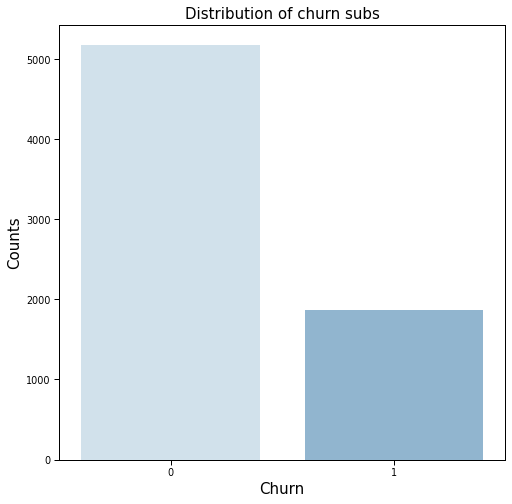

In [ ]:
#Showing a 70:30 imbalance in churn values
print(df_model2['Churn Label'].value_counts(normalize=True))
plt.figure(figsize=(8,8))
churn_cnt = df_model2['Churn Label'].value_counts()
sns.barplot(x=churn_cnt.index, y=churn_cnt.values, alpha=0.6, palette = 'Blues')
plt.xlabel("Churn",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.title("Distribution of churn subs",fontsize=15)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_std_res, y_train_std_res = sm.fit_resample(X_train_std, y_train.ravel())

Best parameters: {'C': 10.0, 'solver': 'liblinear'}
Confusion Matrix: 
 [[751 258]
 [ 79 321]]

LR is done with F1 score 0.77105 Time is 1.3839929103851318
Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Confusion Matrix: 
 [[845 164]
 [157 243]]

SVM is done with F1 score 0.77277 Time is 427.9661934375763
Best parameters: {'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 450}
Confusion Matrix: 
 [[864 145]
 [144 256]]

RandomForest is done with F1 score 0.79497 Time is 1247.3554902076721
8
[0.5392986698911729, 0.5291723202170964, 0.6027689030883919, 0.5941520467836258, 0.6089613034623218, 0.6125541125541126, 0.615075376884422, 0.6265822784810127, 0.627254509018036]
Confusion Matrix: 
 [[724 285]
 [ 87 313]]

KNN is done with F1 score 0.74781 Time is 2.9221622943878174
Best parameters: {'booster': 'gbtree', 'colsample_bytree': 0.6, 'learning_rate': 0.6, 'max_depth': 4, 'min_child_weight': 0.001, 'n_estimators': 9}
Confusion Matrix: 
 [[789 220]
 [103 297]]

XGBoo

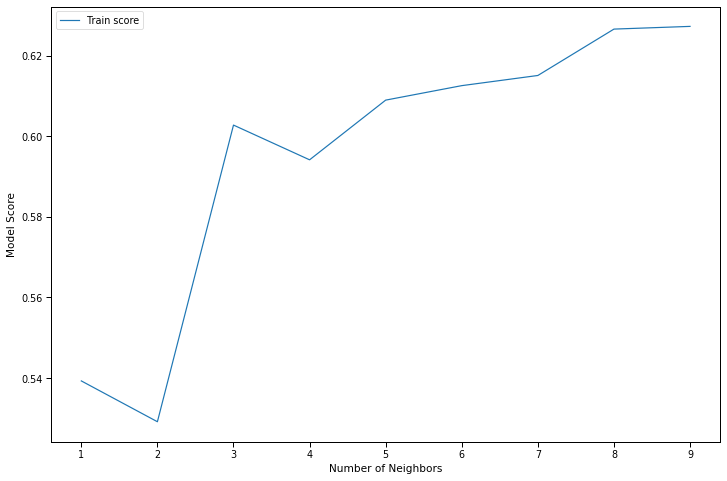

In [ ]:
lrModelWithParameterTuning(X_train_std_res, y_train_std_res,X_test_std, y_test)
#if binaryClassification:
svmModelWithParameterTuning(X_train_std_res, y_train_std_res,X_test_std, y_test)

randomForestModelWithParameterTuning(X_train_std_res, y_train_std_res,X_test_std, y_test)
knnModelWithParameterTuning(X_train_std_res, y_train_std_res,X_test_std, y_test)
XGBoostWithParameterTuning(X_train_std_res, y_train_std_res,X_test_std, y_test)
lightgbm(X_train_std_res, y_train_std_res,X_test_std, y_test)

Best parameters: {'C': 1.0, 'solver': 'liblinear'}
Confusion Matrix: 
 [[739 270]
 [ 76 324]]

LR is done with F1 score 0.76534 Time is 4.299025297164917
Best parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Confusion Matrix: 
 [[780 229]
 [181 219]]

SVM is done with F1 score 0.7137 Time is 625.1885366439819
Best parameters: {'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 50}
Confusion Matrix: 
 [[896 113]
 [173 227]]

RandomForest is done with F1 score 0.79172 Time is 1360.356204032898
8
[0.5016574585635359, 0.47182175622542594, 0.5314834578441836, 0.5048076923076923, 0.5406546990496305, 0.5435779816513762, 0.5519412381951732, 0.5573033707865169, 0.564901349948079]
Confusion Matrix: 
 [[718 291]
 [128 272]]

KNN is done with F1 score 0.71473 Time is 2.8306968212127686
Best parameters: {'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.6, 'max_depth': 4, 'min_child_weight': 0.001, 'n_estimators': 8}
Confusion Matrix: 
 [[859 150]
 [139 261]]

XG

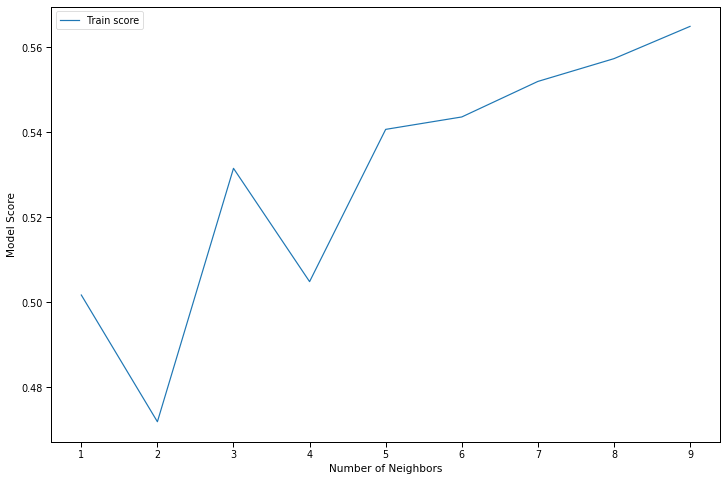

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
lrModelWithParameterTuning(X_train_res, y_train_res,X_test, y_test)
#if binaryClassification:
svmModelWithParameterTuning(X_train_res, y_train_res, X_test, y_test)

randomForestModelWithParameterTuning(X_train_res, y_train_res, X_test, y_test)
knnModelWithParameterTuning(X_train_res, y_train_res, X_test, y_test)
XGBoostWithParameterTuning(X_train_res, y_train_res, X_test, y_test)
lightgbm(X_train_res, y_train_res, X_test, y_test)

In [ ]:
from tensorflow.keras import Input,Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input,Model
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
#X_train_std_res, y_train_std_res,X_test_std, y_test

input_layer = Input(shape=(X_train_std_res.shape[1],))
#normLayer = horsepower_normalizer(input_layer)
'''
dense_layer_1 = Dense(1024,activation='relu')(input_layer)
dense_layer_2 = Dense(1024,activation='relu')(dense_layer_1)
dense_layer_3 = Dense(1024,activation='relu')(dense_layer_2)
dense_layer_4 = Dense(512,activation='relu')(dense_layer_3)
dense_layer_5 = Dense(256,activation='relu')(dense_layer_4)
dense_layer_6 = Dense(256,activation='relu')(dense_layer_5)
'''
dense_layer_1 = Dense(128,activation='relu')(input_layer)
dense_layer_2 = Dense(64,activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32,activation='relu')(dense_layer_2)
output_layer = Dense(1,activation='sigmoid')(dense_layer_3)
model_1 = Model(inputs=input_layer,outputs=output_layer)

model_1.summary()
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(lr=0.001),
              #optimizer = "SGD",
              metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, verbose=1,patience=10, min_lr=0.0000000001)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

history_1 = model_1.fit(X_train_std_res, y_train_std_res,epochs=50,validation_split = 0.2, callbacks=[early_stopping_cb, reduce_lr])


y_pred = model_1.predict(X_test_std)
y_pred

y_pred = [1 if x > 0.5 else 0 for x in y_pred ]
#y_pred_2 = pd.Series(y_pred_2.reshape(1,y_pred.shape[0])[0])
y_pred = pd.Series(y_pred)
#y_pred = pd.Series(y_pred.reshape(1,y_pred.shape[0])[0])
y_pred = y_pred.astype(int)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix,mean_squared_error,r2_score
print(f"F1 Score: {round(f1_score(y_test, y_pred, average='weighted'), 5)}")
classifier_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
print(f"CLASSIFICATION REPORT:\n{classifier_report}")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 dense (Dense)               (None, 128)               4608      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
209/209 [==============================] - 2s 5ms/step - loss: 0.4670 - accuracy: 0.7670 - val_loss: 0.6200 - val_accuracy: 0.7137 - lr: 0.0010
Epoch 2/50
209/209 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.7866 - val_loss: 0.5985 - val_accuracy: 0.7209 - lr: 0.0010
Epoch 3/50
209/209 [==============================] - 1s 3ms/step - loss: 0.4293 - accuracy: 0.7898 - val_loss: 0.4408 - val_accuracy: 0.8373 - lr: 0.0010
Epoch 4/50
209/209 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.7893 - val_loss: 0.4931 - val_accuracy: 0.7995 - lr: 0.0010
Epoch 5/50
209/209 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.7952 - val_loss: 0.7386 - val_accuracy: 0.6327 - lr: 0.0010
Epoch 6/50
209/209 [==============================] - 1s 3ms/step - loss: 0.4098 - accuracy: 0.8019 - val_loss: 0.4742 - val_accuracy: 0.8271 - lr: 0.0010
Epoch 7/50
209/209 [==============================] - 1s 4ms/step - lo

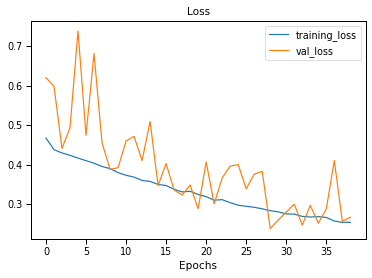

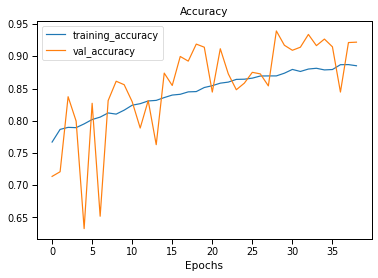

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history_1)
#print(history_1)